In [1]:
from pyforest import *

In [2]:
df = pd.read_csv('encoded.csv')

<IPython.core.display.Javascript object>

In [3]:
pd.options.display.max_columns = None
df

<IPython.core.display.Javascript object>

,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange
0,1,0,2,3,1,41,1,4,4,4,1,2,2,0,0,0,0,0
1,1,0,1,0,3,59,18,4,4,4,9,2,2,1,1,0,0,1
2,0,0,1,0,2,11,13,14,4,17,6,2,2,0,1,0,3,1
3,1,0,1,0,2,44,16,8,4,1,7,2,2,1,1,0,0,1
4,1,1,1,0,1,51,8,12,12,4,5,2,2,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69964,1,2,1,0,9,50,33,3,3,4,9,2,0,1,1,0,0,2
69965,2,1,1,0,14,73,26,6,6,15,9,2,0,1,1,0,1,2
69966,2,1,1,0,2,46,17,9,6,1,9,2,2,0,1,0,3,1
69967,1,2,1,0,5,76,22,10,8,10,9,2,2,1,1,0,1,1


In [4]:
import io
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
X = df.drop('readmitted',1)
y = df['readmitted']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X.columns
os_data_X,os_data_y=os.fit_sample(X, y)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['readmitted'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['readmitted']==0]))
print("Number of subscription",len(os_data_y[os_data_y['readmitted']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['readmitted']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['readmitted']==1])/len(os_data_X))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

length of oversampled data is  127370
Number of no subscription in oversampled data 63685
Number of subscription 63685
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [6]:
df.mean()

race                          0.864369
age                           1.373194
admission_type_id             0.915691
discharge_disposition_id      0.928254
time_in_hospital              4.273364
num_lab_procedures           42.875088
num_medications              15.666424
diag_1                        6.234461
diag_2                        5.654104
diag_3                        5.458975
number_diagnoses              7.224428
max_glu_serum                 1.928697
A1Cresult                     1.686361
change                        0.450085
diabetesMed                   0.761594
readmitted                    0.089811
total_patient_interaction     0.559819
numchange                     1.190170
dtype: float64

In [7]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
reduce_mem_usage(X)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Memory usage of dataframe is 9.08 MB --> 1.20 MB (Decreased by 86.8%)


,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,total_patient_interaction,numchange
0,1,0,2,3,1,41,1,4,4,4,1,2,2,0,0,0,0
1,1,0,1,0,3,59,18,4,4,4,9,2,2,1,1,0,1
2,0,0,1,0,2,11,13,14,4,17,6,2,2,0,1,3,1
3,1,0,1,0,2,44,16,8,4,1,7,2,2,1,1,0,1
4,1,1,1,0,1,51,8,12,12,4,5,2,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69964,1,2,1,0,9,50,33,3,3,4,9,2,0,1,1,0,2
69965,2,1,1,0,14,73,26,6,6,15,9,2,0,1,1,1,2
69966,2,1,1,0,2,46,17,9,6,1,9,2,2,0,1,3,1
69967,1,2,1,0,5,76,22,10,8,10,9,2,2,1,1,1,1


In [9]:
pd.options.display.max_rows = 120
X.corr()

<IPython.core.display.Javascript object>

,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,total_patient_interaction,numchange
race,1.000000,0.093309,0.017875,0.022552,-0.018067,-0.018403,0.016891,0.024901,0.018716,0.002540,0.046701,-0.049746,0.003991,0.001851,-0.004460,0.026382,0.010159
age,0.093309,1.000000,0.033418,0.236304,0.115707,0.024451,0.036397,-0.032995,-0.063140,-0.066898,0.215566,-0.033658,0.110535,-0.033955,-0.016755,0.009742,-0.003644
admission_type_id,0.017875,0.033418,1.000000,0.064542,0.016438,0.153881,-0.118059,-0.046465,-0.015231,-0.009084,0.007814,-0.348152,-0.067298,-0.014567,-0.000997,0.065543,-0.029550
discharge_disposition_id,0.022552,0.236304,0.064542,1.000000,0.223072,0.057766,0.101620,0.049760,0.027266,0.035499,0.119650,-0.069731,0.030118,0.001059,-0.015897,0.000942,-0.020068
time_in_hospital,-0.018067,0.115707,0.016438,0.223072,1.000000,0.332178,0.468059,0.098288,0.098641,0.077534,0.233878,-0.023582,-0.068015,0.111715,0.068656,0.011825,0.086817
num_lab_procedures,-0.018403,0.024451,0.153881,0.057766,0.332178,1.000000,0.259051,-0.059800,0.010167,0.011708,0.154042,0.114716,-0.261240,0.076909,0.045301,0.033245,0.043449
num_medications,0.016891,0.036397,-0.118059,0.101620,0.468059,0.259051,1.000000,0.015029,0.020609,0.010830,0.259272,0.017935,-0.016205,0.245931,0.186699,0.037875,0.236973
diag_1,0.024901,-0.032995,-0.046465,0.049760,0.098288,-0.059800,0.015029,1.000000,0.184087,0.098861,-0.007995,-0.018773,0.036334,0.038443,0.021569,0.026961,0.042277
diag_2,0.018716,-0.063140,-0.015231,0.027266,0.098641,0.010167,0.020609,0.184087,1.000000,0.103751,0.062885,-0.006985,-0.017446,0.031767,0.022901,0.021138,0.027870
diag_3,0.002540,-0.066898,-0.009084,0.035499,0.077534,0.011708,0.010830,0.098861,0.103751,1.000000,0.056093,0.003808,-0.016107,0.024907,0.007799,0.013210,0.008800


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

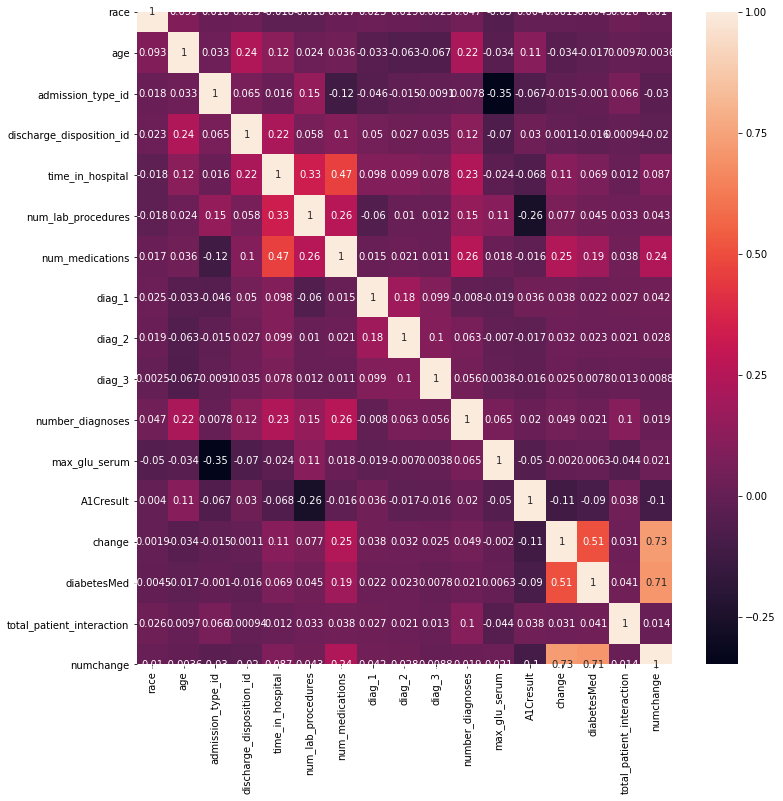

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [11]:
#covariance matrix
cov_mat = np.array(round(X.cov(),2))
cov_mat

<IPython.core.display.Javascript object>

array([[ 2.1000e-01,  3.0000e-02,  0.0000e+00,  2.0000e-02, -2.0000e-02,
        -1.7000e-01,  6.0000e-02,  6.0000e-02,  4.0000e-02,  1.0000e-02,
         4.0000e-02, -1.0000e-02,  0.0000e+00,  0.0000e+00, -0.0000e+00,
         2.0000e-02,  0.0000e+00],
       [ 3.0000e-02,  3.6000e-01,  1.0000e-02,  2.3000e-01,  2.0000e-01,
         2.9000e-01,  1.8000e-01, -1.0000e-01, -1.9000e-01, -2.0000e-01,
         2.6000e-01, -1.0000e-02,  5.0000e-02, -1.0000e-02, -0.0000e+00,
         1.0000e-02, -0.0000e+00],
       [ 0.0000e+00,  1.0000e-02,  3.0000e-01,  6.0000e-02,  3.0000e-02,
         1.6800e+00, -5.4000e-01, -1.3000e-01, -4.0000e-02, -2.0000e-02,
         1.0000e-02, -6.0000e-02, -3.0000e-02, -0.0000e+00, -0.0000e+00,
         5.0000e-02, -2.0000e-02],
       [ 2.0000e-02,  2.3000e-01,  6.0000e-02,  2.6900e+00,  1.0700e+00,
         1.8800e+00,  1.3800e+00,  4.1000e-01,  2.3000e-01,  2.8000e-01,
         3.9000e-01, -4.0000e-02,  3.0000e-02,  0.0000e+00, -1.0000e-02,
         0.0000e+00

In [12]:
round(pd.DataFrame(cov_mat),4)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.21,0.03,0.00,0.02,-0.02,-0.17,0.06,0.06,0.04,0.01,0.04,-0.01,0.00,0.00,-0.00,0.02,0.00
1,0.03,0.36,0.01,0.23,0.20,0.29,0.18,-0.10,-0.19,-0.20,0.26,-0.01,0.05,-0.01,-0.00,0.01,-0.00
2,0.00,0.01,0.30,0.06,0.03,1.68,-0.54,-0.13,-0.04,-0.02,0.01,-0.06,-0.03,-0.00,-0.00,0.05,-0.02
3,0.02,0.23,0.06,2.69,1.07,1.88,1.38,0.41,0.23,0.28,0.39,-0.04,0.03,0.00,-0.01,0.00,-0.03
4,-0.02,0.20,0.03,1.07,8.61,19.39,11.38,1.46,1.47,1.11,1.37,-0.02,-0.14,0.16,0.09,0.05,0.24
5,-0.17,0.29,1.68,1.88,19.39,395.76,42.71,-6.04,1.03,1.14,6.13,0.77,-3.58,0.76,0.38,0.94,0.81
6,0.06,0.18,-0.54,1.38,11.38,42.71,68.69,0.63,0.87,0.44,4.30,0.05,-0.09,1.01,0.66,0.45,1.85
7,0.06,-0.10,-0.13,0.41,1.46,-6.04,0.63,25.78,4.74,2.46,-0.08,-0.03,0.13,0.10,0.05,0.20,0.20
8,0.04,-0.19,-0.04,0.23,1.47,1.03,0.87,4.74,25.76,2.58,0.64,-0.01,-0.06,0.08,0.05,0.15,0.13
9,0.01,-0.20,-0.02,0.28,1.11,1.14,0.44,2.46,2.58,23.96,0.55,0.01,-0.05,0.06,0.02,0.09,0.04


In [13]:
X_std = StandardScaler().fit_transform(X)
type(X_std)

numpy.ndarray

In [14]:
X_std

array([[ 0.29824025, -2.28077782,  1.97100306, ..., -1.78732557,
        -0.39206304, -1.26262032],
       [ 0.29824025, -2.28077782,  0.15325232, ...,  0.55949516,
        -0.39206304, -0.20174633],
       [-1.9006609 , -2.28077782,  0.15325232, ...,  0.55949516,
         1.70895245, -0.20174633],
       ...,
       [ 2.49714139, -0.61984857,  0.15325232, ...,  0.55949516,
         1.70895245, -0.20174633],
       [ 0.29824025,  1.04108068,  0.15325232, ...,  0.55949516,
         0.30827546, -0.20174633],
       [ 0.29824025,  1.04108068,  0.15325232, ..., -1.78732557,
        -0.39206304, -1.26262032]])

In [15]:
X_std = pd.DataFrame(X_std)

<IPython.core.display.Javascript object>

In [16]:
pd.options.display.max_columns = None
X_std

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.298240,-2.280778,1.971003,1.264049,-1.115614,-0.094256,-1.769670,-0.440091,-0.325930,-0.298060,-3.110376,0.211889,0.454864,-0.904689,-1.787326,-0.392063,-1.262620
1,0.298240,-2.280778,0.153252,-0.566362,-0.433982,0.810564,0.281572,-0.440091,-0.325930,-0.298060,0.887262,0.211889,0.454864,1.105352,0.559495,-0.392063,-0.201746
2,-1.900661,-2.280778,0.153252,-0.566362,-0.774798,-1.602290,-0.321734,1.529471,-0.325930,2.357765,-0.611852,0.211889,0.454864,-0.904689,0.559495,1.708952,-0.201746
3,0.298240,-2.280778,0.153252,-0.566362,-0.774798,0.056547,0.040250,0.347734,-0.325930,-0.910943,-0.112148,0.211889,0.454864,1.105352,0.559495,-0.392063,-0.201746
4,0.298240,-0.619849,0.153252,-0.566362,-1.115614,0.408421,-0.925041,1.135559,1.250414,-0.298060,-1.111557,0.211889,0.454864,1.105352,0.559495,-0.392063,0.859128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69964,0.298240,1.041081,0.153252,-0.566362,1.610912,0.358154,2.091493,-0.637047,-0.522972,-0.298060,0.887262,0.211889,-2.445692,1.105352,0.559495,-0.392063,0.859128
69965,2.497141,-0.619849,0.153252,-0.566362,3.314990,1.514312,1.246863,-0.046179,0.068156,1.949177,0.887262,0.211889,-2.445692,1.105352,0.559495,0.308275,0.859128
69966,2.497141,-0.619849,0.153252,-0.566362,-0.774798,0.157082,0.160911,0.544690,0.068156,-0.910943,0.887262,0.211889,0.454864,-0.904689,0.559495,1.708952,-0.201746
69967,0.298240,1.041081,0.153252,-0.566362,0.247649,1.665116,0.764218,0.741646,0.462242,0.927705,0.887262,0.211889,0.454864,1.105352,0.559495,0.308275,-0.201746


In [17]:
#covariance matrix
cov_mat = np.cov(X_std,rowvar=False)
cov_mat.round(1)

<IPython.core.display.Javascript object>

array([[ 1. ,  0.1,  0. ,  0. , -0. , -0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        -0. ,  0. ,  0. , -0. ,  0. ,  0. ],
       [ 0.1,  1. ,  0. ,  0.2,  0.1,  0. ,  0. , -0. , -0.1, -0.1,  0.2,
        -0. ,  0.1, -0. , -0. ,  0. , -0. ],
       [ 0. ,  0. ,  1. ,  0.1,  0. ,  0.2, -0.1, -0. , -0. , -0. ,  0. ,
        -0.3, -0.1, -0. , -0. ,  0.1, -0. ],
       [ 0. ,  0.2,  0.1,  1. ,  0.2,  0.1,  0.1,  0. ,  0. ,  0. ,  0.1,
        -0.1,  0. ,  0. , -0. ,  0. , -0. ],
       [-0. ,  0.1,  0. ,  0.2,  1. ,  0.3,  0.5,  0.1,  0.1,  0.1,  0.2,
        -0. , -0.1,  0.1,  0.1,  0. ,  0.1],
       [-0. ,  0. ,  0.2,  0.1,  0.3,  1. ,  0.3, -0.1,  0. ,  0. ,  0.2,
         0.1, -0.3,  0.1,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.1,  0.1,  0.5,  0.3,  1. ,  0. ,  0. ,  0. ,  0.3,
         0. , -0. ,  0.2,  0.2,  0. ,  0.2],
       [ 0. , -0. , -0. ,  0. ,  0.1, -0.1,  0. ,  1. ,  0.2,  0.1, -0. ,
        -0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.1, -0. ,  0. ,  0.1,  0. ,  0. 

In [18]:
pca = PCA()

In [19]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pc_score = pca.transform(X_std)
pc_score.round(2)

array([[-3.48, -1.22,  1.03, ..., -0.94,  0.28,  0.18],
       [ 0.72, -0.8 , -0.59, ...,  0.25, -0.43, -0.8 ],
       [-0.99, -1.73, -0.63, ...,  0.36,  0.67,  0.11],
       ...,
       [-0.29,  0.08,  0.42, ...,  0.92,  0.22,  0.08],
       [ 1.58,  1.11, -0.19, ...,  0.32,  0.15, -0.9 ],
       [-2.56,  0.89,  0.11, ..., -1.44, -0.96,  0.1 ]])

In [21]:
#captured variance by each principal components
pca.explained_variance_.round(2)

array([2.59, 1.85, 1.42, 1.34, 1.29, 1.04, 1.01, 0.93, 0.91, 0.84, 0.77,
       0.7 , 0.66, 0.5 , 0.48, 0.45, 0.2 ])

In [22]:
cov_mat = np.cov(pc_score,rowvar=False)
cov_mat.round(1)

<IPython.core.display.Javascript object>

array([[ 2.6,  0. ,  0. ,  0. , -0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ,
         0. , -0. , -0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1.9, -0. ,  0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ,
         0. , -0. , -0. ,  0. , -0. ,  0. ],
       [ 0. , -0. ,  1.4,  0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ,
         0. , -0. , -0. ,  0. , -0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1.3, -0. ,  0. , -0. ,  0. , -0. , -0. , -0. ,
        -0. ,  0. ,  0. , -0. ,  0. , -0. ],
       [-0. ,  0. ,  0. , -0. ,  1.3,  0. , -0. , -0. ,  0. , -0. , -0. ,
        -0. ,  0. , -0. , -0. ,  0. , -0. ],
       [-0. , -0. , -0. ,  0. ,  0. ,  1. ,  0. , -0. ,  0. , -0. , -0. ,
         0. ,  0. ,  0. , -0. ,  0. , -0. ],
       [ 0. ,  0. ,  0. , -0. , -0. ,  0. ,  1. ,  0. , -0. ,  0. ,  0. ,
        -0. ,  0. ,  0. , -0. , -0. , -0. ],
       [-0. , -0. , -0. ,  0. , -0. , -0. ,  0. ,  0.9,  0. , -0. , -0. ,
         0. ,  0. , -0. , -0. ,  0. , -0. ],
       [ 0. ,  0. ,  0. , -0. ,  0. ,  0. , -0. 

In [23]:
#percentage of variance
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

<IPython.core.display.Javascript object>

array([15.2, 10.9,  8.3,  7.9,  7.6,  6.1,  5.9,  5.5,  5.3,  5. ,  4.5,
        4.1,  3.9,  2.9,  2.8,  2.7,  1.2])

In [24]:
np.cumsum(exp_var)

<IPython.core.display.Javascript object>

array([15.2, 26.1, 34.4, 42.3, 49.9, 56. , 61.9, 67.4, 72.7, 77.7, 82.2,
       86.3, 90.2, 93.1, 95.9, 98.6, 99.8])

In [25]:
a = np.cumsum(exp_var)

<IPython.core.display.Javascript object>

In [28]:
a = list(np.cumsum(exp_var))
a[12]

<IPython.core.display.Javascript object>

90.2

In [29]:
labels = ['PC' + str(x) for x in range(1,len(exp_var)+1)]

In [30]:
labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17']

In [31]:
pcdf = pd.DataFrame(pc_score, columns = labels)
#pc score are the values which we get after multiplying loading with X_std

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

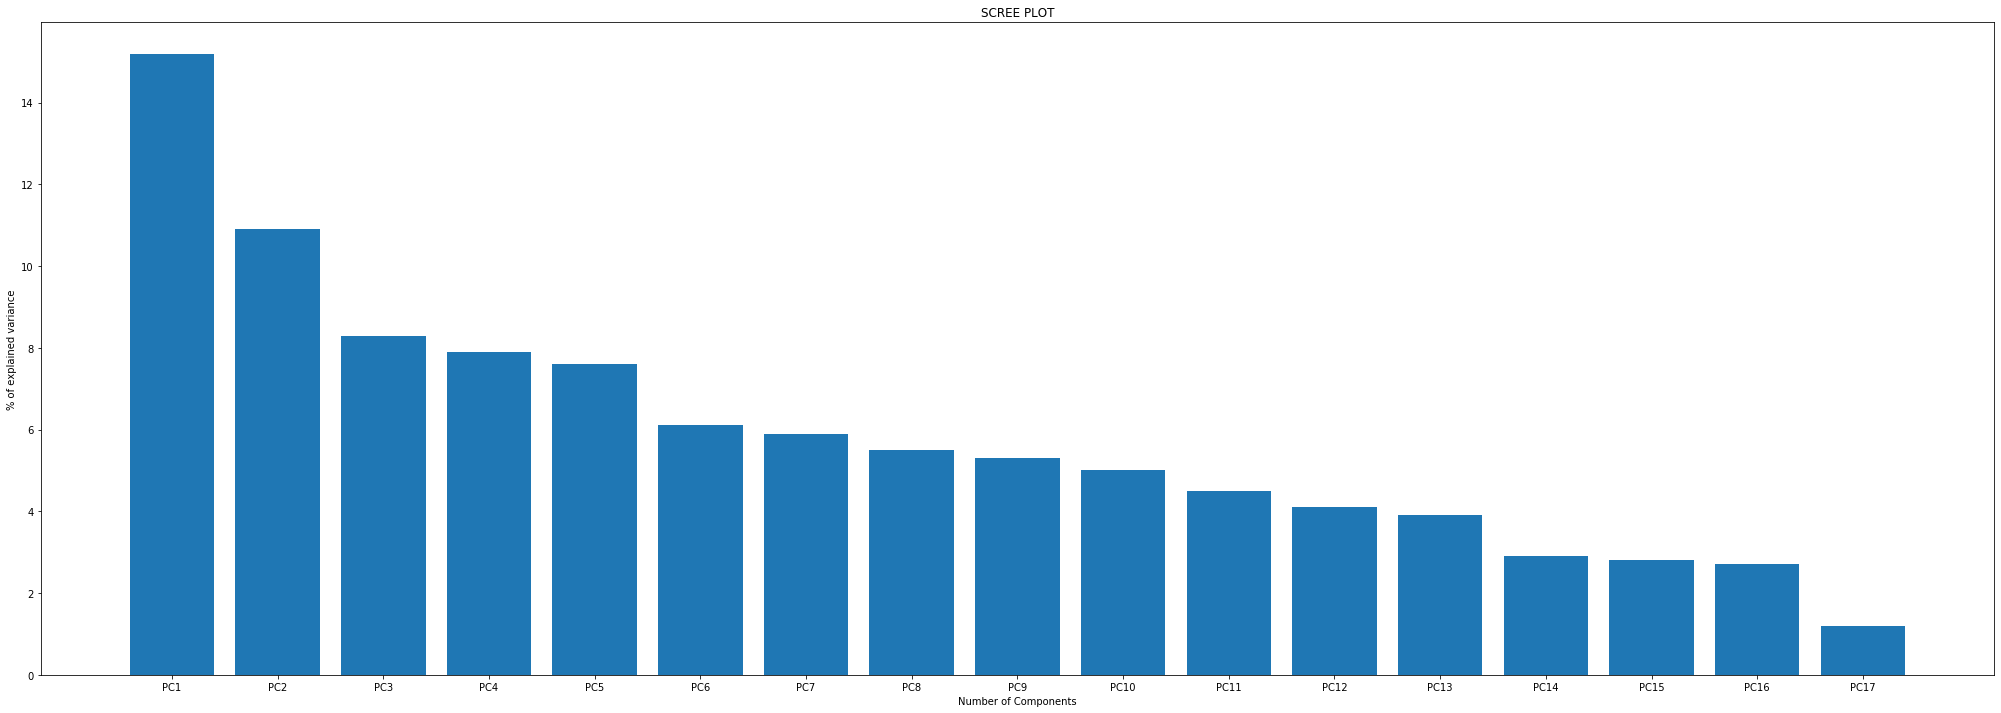

In [32]:
plt.figure(figsize=(35,12))
plt.bar(x = labels, height = exp_var)
plt.xlabel("Number of Components")
plt.ylabel("% of explained variance")
plt.title("SCREE PLOT")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

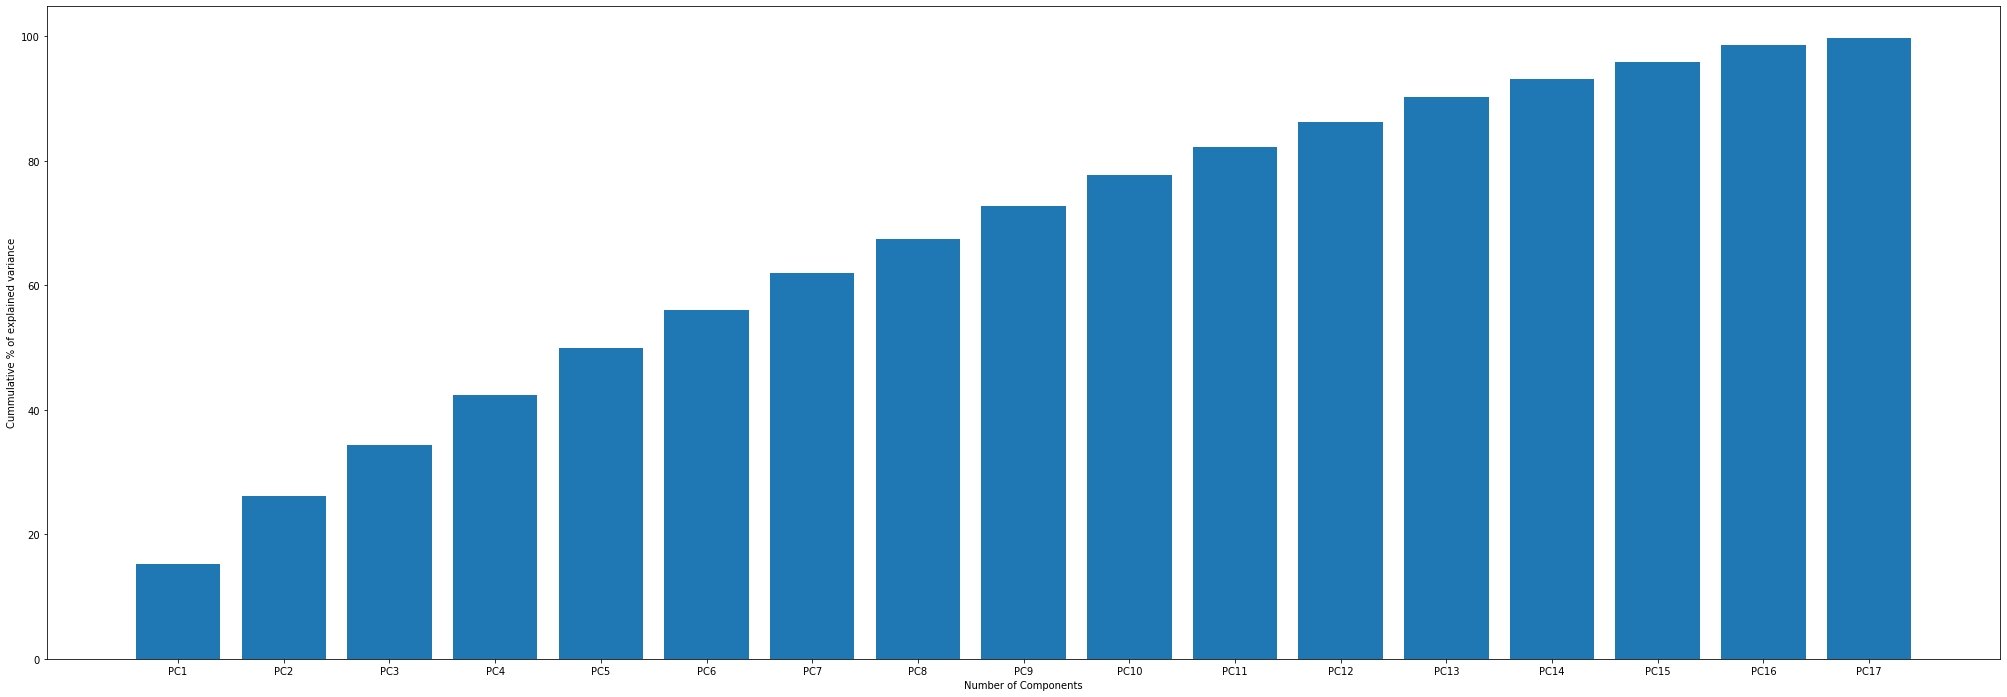

In [33]:
plt.figure(figsize=(35,12))
plt.bar(x = labels, height = a)
plt.xlabel("Number of Components")
plt.ylabel("Cummulative % of explained variance")
plt.show()

In [34]:
pcdf['readmitted'] = df['readmitted']

In [36]:
X = pcdf.iloc[:,0:11]
Y = pcdf['readmitted']

In [37]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-3.483308,-1.221161,1.033987,1.534943,1.257364,-1.134730,-0.094034,0.252026,0.018219,1.351817,1.629952
1,0.716829,-0.795848,-0.585612,0.933939,0.157870,0.672062,0.307809,0.599185,-0.949696,-0.566414,-0.039182
2,-0.993477,-1.727942,-0.630691,-0.930041,2.499126,1.021854,2.418778,-1.497065,-0.574367,1.385082,-0.328519
3,0.229442,-1.659478,-0.361559,0.476804,0.319323,0.255475,0.273904,1.226090,-0.378139,0.038053,-0.102864
4,0.467808,-2.029797,0.086476,-0.463716,1.179609,-0.187960,-0.648835,0.536751,0.874860,-0.309263,-0.279519
...,...,...,...,...,...,...,...,...,...,...,...
69964,2.858798,1.083469,-0.404224,1.534434,-0.809236,-0.128008,-0.778423,0.396381,-0.403648,-0.182364,-0.433016
69965,3.448904,1.862574,-0.732656,1.431699,1.657287,1.003011,-2.190256,0.107393,-2.056411,0.714851,0.066649
69966,-0.288394,0.080236,0.420868,-0.587724,-0.142220,2.701653,-1.267125,1.404937,-0.002718,0.411448,-0.055416
69967,1.575782,1.111468,-0.187037,-0.301793,0.388025,0.795024,-0.289089,-0.368453,-0.154768,-0.351610,-1.165617


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

### Decision Tree (Base)

In [39]:
import warnings
warnings.filterwarnings('ignore')

import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import seaborn             as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import re
%matplotlib inline

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10,random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=28, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
dtree_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test,dtree_pred)
print(cm)

[[17661  1450]
 [ 1721   159]]


In [42]:
cr = classification_report(y_test,dtree_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     19111
           1       0.10      0.08      0.09      1880

    accuracy                           0.85     20991
   macro avg       0.51      0.50      0.50     20991
weighted avg       0.84      0.85      0.84     20991



In [43]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.85
Precision is 0.10
Recall is 0.08


### Random Forest (Base)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10,random_state=0)
rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
rm_prd = rm.predict(X_test)
cm = confusion_matrix(y_test,rm_prd)
print(cm)

[[19076    35]
 [ 1876     4]]


In [46]:
cr = classification_report(y_test,rm_prd)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19111
           1       0.10      0.00      0.00      1880

    accuracy                           0.91     20991
   macro avg       0.51      0.50      0.48     20991
weighted avg       0.84      0.91      0.87     20991



In [47]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

Accuracy is 0.91
Precision is 0.10
Recall is 0.00


In [48]:
from sklearn.preprocessing import scale as scale
scaled_df = scale(df)
scaled_df

array([[ 0.29824025, -2.28077782,  1.97100306, ..., -0.31412284,
        -0.39206304, -1.26262032],
       [ 0.29824025, -2.28077782,  0.15325232, ..., -0.31412284,
        -0.39206304, -0.20174633],
       [-1.9006609 , -2.28077782,  0.15325232, ..., -0.31412284,
         1.70895245, -0.20174633],
       ...,
       [ 2.49714139, -0.61984857,  0.15325232, ..., -0.31412284,
         1.70895245, -0.20174633],
       [ 0.29824025,  1.04108068,  0.15325232, ..., -0.31412284,
         0.30827546, -0.20174633],
       [ 0.29824025,  1.04108068,  0.15325232, ..., -0.31412284,
        -0.39206304, -1.26262032]])

In [49]:
scaled_df = pd.DataFrame(scaled_df)

In [50]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.298240,-2.280778,1.971003,1.264049,-1.115614,-0.094256,-1.769670,-0.440091,-0.325930,-0.298060,-3.110376,0.211889,0.454864,-0.904689,-1.787326,-0.314123,-0.392063,-1.262620
1,0.298240,-2.280778,0.153252,-0.566362,-0.433982,0.810564,0.281572,-0.440091,-0.325930,-0.298060,0.887262,0.211889,0.454864,1.105352,0.559495,-0.314123,-0.392063,-0.201746
2,-1.900661,-2.280778,0.153252,-0.566362,-0.774798,-1.602290,-0.321734,1.529471,-0.325930,2.357765,-0.611852,0.211889,0.454864,-0.904689,0.559495,-0.314123,1.708952,-0.201746
3,0.298240,-2.280778,0.153252,-0.566362,-0.774798,0.056547,0.040250,0.347734,-0.325930,-0.910943,-0.112148,0.211889,0.454864,1.105352,0.559495,-0.314123,-0.392063,-0.201746
4,0.298240,-0.619849,0.153252,-0.566362,-1.115614,0.408421,-0.925041,1.135559,1.250414,-0.298060,-1.111557,0.211889,0.454864,1.105352,0.559495,-0.314123,-0.392063,0.859128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69964,0.298240,1.041081,0.153252,-0.566362,1.610912,0.358154,2.091493,-0.637047,-0.522972,-0.298060,0.887262,0.211889,-2.445692,1.105352,0.559495,-0.314123,-0.392063,0.859128
69965,2.497141,-0.619849,0.153252,-0.566362,3.314990,1.514312,1.246863,-0.046179,0.068156,1.949177,0.887262,0.211889,-2.445692,1.105352,0.559495,-0.314123,0.308275,0.859128
69966,2.497141,-0.619849,0.153252,-0.566362,-0.774798,0.157082,0.160911,0.544690,0.068156,-0.910943,0.887262,0.211889,0.454864,-0.904689,0.559495,-0.314123,1.708952,-0.201746
69967,0.298240,1.041081,0.153252,-0.566362,0.247649,1.665116,0.764218,0.741646,0.462242,0.927705,0.887262,0.211889,0.454864,1.105352,0.559495,-0.314123,0.308275,-0.201746


## K-Means Clustering

In [51]:
#USing SCREE PLOT to find optimal number of clusters
#Finding optimal number of clusters
#Scree plot
cluster_range = range(1,10)
cluster_wss = []

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_wss.append(clusters.inertia_)
    
from collections import OrderedDict
clusters_df = pd.DataFrame(OrderedDict(
                {'num_clusters':cluster_range,
                'cluster_wss':cluster_wss}))

In [52]:
clusters_df

,num_clusters,cluster_wss
0,1,1.259442e+06
1,2,1.126820e+06
2,3,1.057347e+06
3,4,9.914780e+05
4,5,9.457396e+05
5,6,8.993082e+05
6,7,8.630794e+05
7,8,8.406551e+05
8,9,8.191227e+05


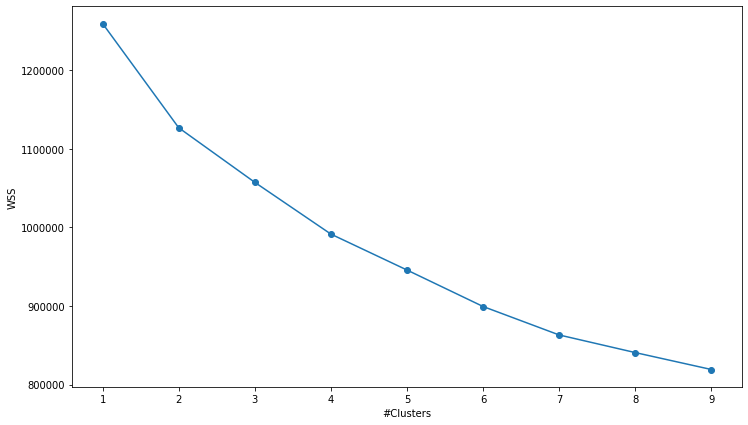

In [53]:
plt.figure(figsize=(12,7))
plt.xlabel('#Clusters')
plt.ylabel('WSS')
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss,marker='o')
plt.show()

From the above Scree Plot we can see that ? clusters can be said as the optimal number of clusters

In [62]:
#Building KMeans Cluster Model
kcluster = KMeans(n_clusters = 3, random_state = 1)
kcluster.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [63]:
df['clusters_kmeans'] = kcluster.fit_predict(scaled_df)  #can use only .predict if u have fitted the data alrdy
df

,race,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,total_patient_interaction,numchange,clusters_kmeans,color
0,1,0,2,3,1,41,1,4,4,4,1,2,2,0,0,0,0,0,1,green
1,1,0,1,0,3,59,18,4,4,4,9,2,2,1,1,0,0,1,0,blue
2,0,0,1,0,2,11,13,14,4,17,6,2,2,0,1,0,3,1,0,green
3,1,0,1,0,2,44,16,8,4,1,7,2,2,1,1,0,0,1,0,blue
4,1,1,1,0,1,51,8,12,12,4,5,2,2,1,1,0,0,2,0,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69964,1,2,1,0,9,50,33,3,3,4,9,2,0,1,1,0,0,2,2,purple
69965,2,1,1,0,14,73,26,6,6,15,9,2,0,1,1,0,1,2,2,purple
69966,2,1,1,0,2,46,17,9,6,1,9,2,2,0,1,0,3,1,0,green
69967,1,2,1,0,5,76,22,10,8,10,9,2,2,1,1,0,1,1,2,purple


In [64]:
df['clusters_kmeans'].value_counts()

0    31527
2    21849
1    16593
Name: clusters_kmeans, dtype: int64

In [65]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_df)
## Getting a visual plot
## Defining Colours and Lables for the plot
def color_fun(row):
    if(row['clusters_kmeans'] == 0):
        return "red"
    if(row['clusters_kmeans'] == 1):
        return "blue"
    if(row['clusters_kmeans'] == 2):
        return "green"
    if(row['clusters_kmeans'] == 3):
        return "purple"
    return 0

df['color'] = df.apply(lambda row: color_fun(row), axis = 1)

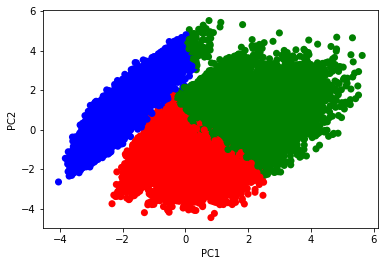

In [66]:
plt.scatter(x = plot_columns[:,0],
            y = plot_columns[:,1], 
            c = df['color'].values.tolist(),
            s = 50, edgecolors = 'none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()